In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time

In [2]:
import json

In [3]:
# Setup Chrome driver
options = webdriver.ChromeOptions()

In [4]:
options.set_capability('goog:loggingPrefs', {"performance": "ALL", "browser":"ALL"})

In [5]:
#options.add_argument('--headless')  # run in headless mode (without GUI)
options.add_argument('--window-size=1920,1080')
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

#url = "https://www.sofascore.com/it/football/match/como-venezia/Ndbseeb#id:12501598"
url = "https://www.sofascore.com/it/football/match/genoa-udinese/Vdbsneb#id:12501560"
driver.get(url)

In [6]:
# Consent button for cookies
# Wait explicitly until the button is clickable, then click it
try:
    # Contains-text version (more robust):
    consent_button = WebDriverWait(driver, 15).until(
        EC.element_to_be_clickable((
            By.XPATH, '//button[.//p[text()="Consent"]]'
        ))
    )
    consent_button.click()
    print("Cookie consent closed.")
except Exception as e:
    print("Cookie consent popup not found or already closed.", e)

Cookie consent closed.


In [7]:
# Sometimes you need to scroll to load dynamic content
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(3)  # Wait a bit more if necessary

In [69]:
logs_raw = driver.get_log("performance")
logs = [json.loads(lr['message'])['message'] for lr in logs_raw]

In [70]:
for x in logs:
    if 'shotmap' in x['params'].get('headers', {}).get(':path', ''):
        print(x['params'].get('headers', {}).get(':path', ''))
        break

/api/v1/event/12501560/shotmap


In [71]:
x['params']['requestId']

'91886.4230'

In [72]:
    
shotmap = json.loads(driver.execute_cdp_cmd('Network.getResponseBody', {'requestId': x['params']['requestId']})['body'])

In [73]:
for x in logs:
    if 'lineups' in x['params'].get('headers', {}).get(':path', ''):
        print(x['params'].get('headers', {}).get(':path', ''))
        break

/api/v1/event/12501560/lineups


In [74]:
print(x['params'].get('headers', {}).get(':path', ''))

/api/v1/event/12501560/lineups


In [75]:
x['params']['requestId']

'91886.4277'

In [77]:
lineups = json.loads(driver.execute_cdp_cmd('Network.getResponseBody', {'requestId': x['params']['requestId']})['body'])

In [79]:
hometeam = lineups['home']['players']

In [115]:
hometeamnames = [p for p in hometeam if len(p['statistics'])>0]

In [117]:
len(hometeamnames)

16

In [118]:
pl = hometeamnames[1]

In [122]:
player_name = pl['player']['name']

In [124]:
def click_player_by_name(driver, player_name, timeout=10):
    """
    Clicks the player element containing the given name using JavaScript.
    
    Parameters:
        driver: Selenium WebDriver instance.
        player_name (str): Name of the player to click.
        timeout (int): Maximum time to wait for the element (in seconds).
    """
    try:
        # XPath to find clickable ancestor of the span with player name
        xpath = f'''
        //span[@data-testid="lineups_name" and normalize-space(text())="{player_name}"]
        /ancestor::*[
            self::button or self::a or @onclick or @role="button"
        ][1]
        '''

        # Wait until the element is present in the DOM
        clickable_element = WebDriverWait(driver, timeout).until(
            EC.presence_of_element_located((By.XPATH, xpath))
        )

        # Scroll to the element and click using JavaScript
        driver.execute_script("arguments[0].scrollIntoView({block: 'center', inline: 'center'});", clickable_element)
        driver.execute_script("arguments[0].click();", clickable_element)

        print(f"✅ Clicked player: {player_name}")
    except Exception as e:
        print(f"❌ Failed to click player '{player_name}': {e}")

In [130]:
clickable_element = WebDriverWait(driver, 15).until(
    EC.presence_of_element_located((
        By.XPATH, '''
        //span[@data-testid="lineups_name" and text()="Caleb Ekuban"]
        /ancestor::*[
            self::button or self::a or @onclick or @role="button"
        ][1]
        '''
    ))
)

In [133]:
click_player_by_name(driver, "Caleb Ekuban", timeout=10)

✅ Clicked player: Caleb Ekuban


In [131]:
driver.execute_script("arguments[0].click();", clickable_element)

In [49]:
logs_raw = driver.get_log("performance")
logs = [json.loads(lr['message'])['message'] for lr in logs_raw]

In [50]:
x = None
for x in logs:
    #print(x['params'].get('headers', {}).get(':path', ''))
    if 'heatmap' in x['params'].get('headers', {}).get(':path', ''):
        print(x['params'].get('headers', {}).get(':path', ''))
        break
    else:
        x = None
if x is None: 
    print("not found")

/api/v1/event/12501560/player/978301/heatmap


In [51]:
heatmapx = [x for x in logs if 'heatmap' in x['params'].get('headers', {}).get(':path', '')]

In [55]:
for x in heatmapx:
    print(x['params'].get('headers', {}).get(':path', ''))

/api/v1/event/12501560/player/978301/heatmap
/api/v1/event/12501560/player/978301/heatmap


In [56]:
 heatmap_request_id = x["params"]["requestId"]

In [57]:
heatmapdata = json.loads(driver.execute_cdp_cmd('Network.getResponseBody', {'requestId': heatmap_request_id})['body'])

In [58]:
heatmapdata

{'heatmap': [{'x': 32, 'y': 53},
  {'x': 25, 'y': 56},
  {'x': 32, 'y': 38},
  {'x': 42, 'y': 52},
  {'x': 42, 'y': 52},
  {'x': 77, 'y': 14},
  {'x': 77, 'y': 25},
  {'x': 55, 'y': 6},
  {'x': 54, 'y': 5},
  {'x': 44, 'y': 11},
  {'x': 40, 'y': 86},
  {'x': 46, 'y': 43},
  {'x': 69, 'y': 38},
  {'x': 59, 'y': 12},
  {'x': 46, 'y': 93},
  {'x': 47, 'y': 26},
  {'x': 51, 'y': 64},
  {'x': 53, 'y': 8},
  {'x': 24, 'y': 25},
  {'x': 22, 'y': 24}]}

In [59]:
from scipy.stats import gaussian_kde
import numpy as np

In [61]:
datapoints = heatmapdata['heatmap']

In [62]:
xy = np.array([(d['x'], d['y']) for d in datapoints]).T

In [63]:
density = gaussian_kde(xy)(xy)

In [64]:
x = xy[0]; y = xy[1]

In [65]:
idx = density.argsort()
x, y, density = x[idx], y[idx], density[idx]

In [66]:
import matplotlib.pyplot as plt

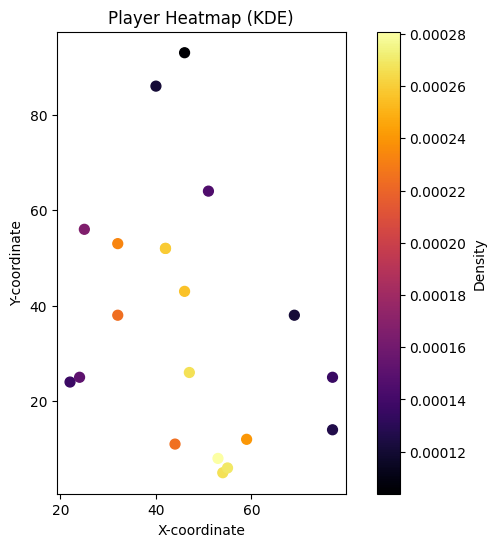

In [67]:

fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(x, y, c=density, s=50, cmap='inferno')
plt.colorbar(sc, label='Density')

ax.set_title("Player Heatmap (KDE)")
ax.set_xlabel("X-coordinate")
ax.set_ylabel("Y-coordinate")
ax.set_aspect('equal')

plt.show()